In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Reading data

In [9]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'

In [10]:
!wget $data

--2023-10-03 18:25:51--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1,4M) [text/plain]
Saving to: ‘data.csv.2’

data.csv.2          100%[===================>]   1,41M  2,09MB/s    in 0,7s    

2023-10-03 18:25:52 (2,09 MB/s) - ‘data.csv.2’ saved [1475504/1475504]



In [11]:
df_raw = pd.read_csv('data.csv')
df_raw.head() 

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [12]:
df = df_raw[['Make','Model','Year','Engine HP','Engine Cylinders','Transmission Type',
             'Vehicle Style','highway MPG','city mpg','MSRP']]
df.columns = df.columns.str.replace(' ', '_').str.lower()

In [13]:
df = df.fillna(0)
df = df.rename(columns={"msrp": "price"})
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [14]:
df['transmission_type'].value_counts()

AUTOMATIC           8266
MANUAL              2935
AUTOMATED_MANUAL     626
DIRECT_DRIVE          68
UNKNOWN               19
Name: transmission_type, dtype: int64

Q1: AUTOMATIC is the most common transmission type

## Correlation matrix for numeric variables

In [15]:
numerical_cols = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']
categorical_cols = ['make', 'model', 'year', 'transmission_type', 'vehicle_style']

In [16]:
df[numerical_cols] = df[numerical_cols].apply(lambda x: pd.to_numeric(x, errors='coerce'))

In [17]:
df.head().T

,0,1,2,3,4
make,BMW,BMW,BMW,BMW,BMW
model,1 Series M,1 Series,1 Series,1 Series,1 Series
year,2011,2011,2011,2011,2011
engine_hp,335.0,300.0,300.0,230.0,230.0
engine_cylinders,6.0,6.0,6.0,6.0,6.0
transmission_type,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL
vehicle_style,Coupe,Convertible,Coupe,Coupe,Convertible
highway_mpg,26,28,28,28,28
city_mpg,19,19,20,18,18
price,46135,40650,36350,29450,34500


                  engine_hp  engine_cylinders  highway_mpg  city_mpg
engine_hp          1.000000          0.774851    -0.415707 -0.424918
engine_cylinders   0.774851          1.000000    -0.614541 -0.587306
highway_mpg       -0.415707         -0.614541     1.000000  0.886829
city_mpg          -0.424918         -0.587306     0.886829  1.000000


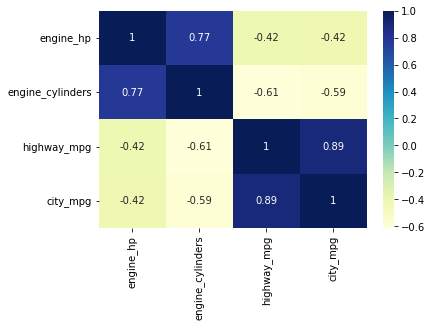

In [18]:
print(df[numerical_cols].corr())

dataplot = sns.heatmap(df[numerical_cols].corr(), cmap="YlGnBu", annot=True)
plt.show()

Q2: engine_hp and engine_cylinders have the highest correlation in the dataset

## Make price a binary variable

In [19]:
mean_price = df['price'].mean()
df['above_average'] = np.where(df['price'] > mean_price,1,0)
df['above_average'].value_counts(normalize=True)

0    0.725617
1    0.274383
Name: above_average, dtype: float64

## Setting up the validation framework

* Perform the train/validation/test split with Scikit-Learn

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [22]:
len(df_train), len(df_val), len(df_test)

(7148, 2383, 2383)

In [23]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_full_train = df_full_train.reset_index(drop=True)

In [24]:
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

df_train = df_train.drop(['above_average', 'price'], axis=1)
df_val= df_val.drop(['above_average', 'price'], axis=1)
df_test = df_test.drop(['above_average', 'price'], axis=1)

## EDA with categorical variables

In [25]:
df_full_train[categorical_cols].nunique()

make                  48
model                902
year                  28
transmission_type      5
vehicle_style         16
dtype: int64

In [26]:
from sklearn.metrics import mutual_info_score

In [27]:
mutual_info_score(df_full_train.above_average, df_full_train.make)

0.2387236479073192

In [28]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.above_average)

In [29]:
mi = df_full_train[categorical_cols].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

model                0.460994
make                 0.238724
vehicle_style        0.083390
year                 0.073605
transmission_type    0.020884
dtype: float64

Q3: transmission_type has the lowest mutual score

## 3.8 One-hot encoding

* Use Scikit-Learn to encode categorical features

In [30]:
from sklearn.feature_extraction import DictVectorizer

In [31]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical_cols + numerical_cols].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical_cols + numerical_cols].to_dict(orient='records')
X_val = dv.transform(val_dict)

## 3.9 Logistic regression

* Binary classification
* Linear vs logistic regression

In [32]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)

In [33]:
model.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [34]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_val)
round(accuracy_score(y_val, y_pred),2)

0.93

In [35]:
original_acc = accuracy_score(y_val, y_pred)

Q4: accuracy is 93%

## Feature elimination

In [36]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'city_mpg': 0.049,
 'engine_cylinders': 0.01,
 'engine_hp': 0.033,
 'highway_mpg': 0.044,
 'make=Acura': 1.056,
 'make=Alfa Romeo': 0.626,
 'make=Aston Martin': 0.24,
 'make=Audi': 2.202,
 'make=BMW': 1.896,
 'make=Bentley': 0.083,
 'make=Bugatti': 0.0,
 'make=Buick': -0.403,
 'make=Cadillac': 1.866,
 'make=Chevrolet': -1.482,
 'make=Chrysler': -1.245,
 'make=Dodge': -2.871,
 'make=FIAT': -0.203,
 'make=Ferrari': 0.142,
 'make=Ford': -1.367,
 'make=GMC': -0.847,
 'make=Genesis': 0.178,
 'make=HUMMER': 0.002,
 'make=Honda': -1.212,
 'make=Hyundai': -2.067,
 'make=Infiniti': 0.273,
 'make=Kia': -1.454,
 'make=Lamborghini': 0.004,
 'make=Land Rover': 1.84,
 'make=Lexus': 1.181,
 'make=Lincoln': 1.105,
 'make=Lotus': 2.352,
 'make=Maserati': 0.426,
 'make=Maybach': 0.002,
 'make=Mazda': -1.1,
 'make=McLaren': 0.0,
 'make=Mercedes-Benz': 1.175,
 'make=Mitsubishi': -0.947,
 'make=Nissan': -0.805,
 'make=Oldsmobile': -0.584,
 'make=Plymouth': -0.048,
 'make=Pontiac': -1.637,
 'make=Porsche':

In [37]:
def prepare_df(df_train, df_val, columns_excl):
    dv = DictVectorizer(sparse=False)
    print(f'Exclude {columns_excl}')
    
    df_train = df_train[categorical_cols + numerical_cols].drop(columns=columns_excl)
    df_val = df_val[categorical_cols + numerical_cols].drop(columns=columns_excl)

    train_dict = df_train.to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)

    val_dict = df_val.to_dict(orient='records')
    X_val = dv.transform(val_dict)
    
    return X_train, X_val

In [38]:
def train_model(X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    print (f'Accuracy diff {round(original_acc - accuracy_score(y_val, y_pred),4)}')

In [39]:
elimination_cols = ['year', 'engine_hp', 'transmission_type', 'city_mpg']
for col in elimination_cols:
    X_train, X_val = prepare_df(df_train, df_val, [col])
    train_model(X_train, y_train, X_val, y_val)

Exclude ['year']
Accuracy diff -0.013
Exclude ['engine_hp']
Accuracy diff 0.0046
Exclude ['transmission_type']
Accuracy diff -0.0113
Exclude ['city_mpg']
Accuracy diff -0.0113


Q5: the feature engine_hp has the smallest diff for the metric accuracy when we remove it

## Linear regression

In [40]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [41]:
len(df_train), len(df_val), len(df_test)

(7148, 2383, 2383)

In [42]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_full_train = df_full_train.reset_index(drop=True)

In [43]:
y_train = np.log1p(df_train.price.values)
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)

df_train = df_train.drop(['above_average', 'price'], axis=1)
df_val= df_val.drop(['above_average', 'price'], axis=1)
df_test = df_test.drop(['above_average', 'price'], axis=1)

In [44]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical_cols + numerical_cols].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical_cols + numerical_cols].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [45]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [47]:
dv.get_feature_names_out()

array(['city_mpg', 'engine_cylinders', 'engine_hp', 'highway_mpg',
       'make=Acura', 'make=Alfa Romeo', 'make=Aston Martin', 'make=Audi',
       'make=BMW', 'make=Bentley', 'make=Bugatti', 'make=Buick',
       'make=Cadillac', 'make=Chevrolet', 'make=Chrysler', 'make=Dodge',
       'make=FIAT', 'make=Ferrari', 'make=Ford', 'make=GMC',
       'make=Genesis', 'make=HUMMER', 'make=Honda', 'make=Hyundai',
       'make=Infiniti', 'make=Kia', 'make=Lamborghini', 'make=Land Rover',
       'make=Lexus', 'make=Lincoln', 'make=Lotus', 'make=Maserati',
       'make=Maybach', 'make=Mazda', 'make=McLaren', 'make=Mercedes-Benz',
       'make=Mitsubishi', 'make=Nissan', 'make=Oldsmobile',
       'make=Plymouth', 'make=Pontiac', 'make=Porsche',
       'make=Rolls-Royce', 'make=Saab', 'make=Scion', 'make=Spyker',
       'make=Subaru', 'make=Suzuki', 'make=Tesla', 'make=Toyota',
       'make=Volkswagen', 'make=Volvo', 'model=1 Series', 'model=100',
       'model=124 Spider', 'model=190-Class', 'model

In [50]:
from sklearn.linear_model import Ridge
alpha_list = [0, 0.01, 0.1, 1, 10]

for alpha in alpha_list:
    print(f'For alpha {alpha}')
    lin_model = Ridge(solver='sag', random_state=42, alpha=alpha)
    lin_model.fit(X_train, y_train)
    y_pred = lin_model.predict(X_val)
    print(f'RMSE {round(rmse(y_val, y_pred),3)}')

For alpha 0
RMSE 0.494
For alpha 0.01
RMSE 0.494
For alpha 0.1
RMSE 0.494
For alpha 1
RMSE 0.494
For alpha 10
RMSE 0.494
